# Introduction

This is a case study for the Google Data Analytics Professional Certificate. Bellabeat is a high-tech manufacturer of health-focused products for women while a successful small company. Founded in 2013, they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunites for the company. 

The data used for this project is found on the Kaggle website and can be viewed and downloaded [here](https://www.kaggle.com/datasets/arashnic/fitbit)

# ASK

**Questions for analysis**
<br>
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help inuence Bellabeat marketing strategy?

**Business Task**
<br> Based on trends in smart device usage, analyze potential avenues for expansion and propose enhancements to the Bellabeat marketing strategy.

**Stakeholders**
1. Urška Sršen
2. Sando Mur
3. Customers/users

# Prepare

In [6]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
import datetime

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
#read in data from files
daily_activity = pd.read_csv(r"C:\Users\Rome\Documents\Battlebeat Data Tracker\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
daily_calories = pd.read_csv(r"C:\Users\Rome\Documents\Battlebeat Data Tracker\Fitabase Data 4.12.16-5.12.16\dailyCalories_merged.csv")
sleep_day = pd.read_csv(r"C:\Users\Rome\Documents\Battlebeat Data Tracker\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
daily_steps = pd.read_csv(r"C:\Users\Rome\Documents\Battlebeat Data Tracker\Fitabase Data 4.12.16-5.12.16\dailySteps_merged.csv")
weight_log = pd.read_csv(r"C:\Users\Rome\Documents\Battlebeat Data Tracker\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv")

# Process

In [10]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [11]:
sleep_day.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


In [12]:
daily_calories.head(10)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863
5,1503960366,4/17/2016,1728
6,1503960366,4/18/2016,1921
7,1503960366,4/19/2016,2035
8,1503960366,4/20/2016,1786
9,1503960366,4/21/2016,1775


In [13]:
daily_steps.head(10)

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
5,1503960366,4/17/2016,9705
6,1503960366,4/18/2016,13019
7,1503960366,4/19/2016,15506
8,1503960366,4/20/2016,10544
9,1503960366,4/21/2016,9819


In [14]:
weight_log.head(10)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
5,4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,25.0,27.450001,True,1460937599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
7,4558609924,4/18/2016 11:59:59 PM,69.699997,153.662190,NaN,27.250000,True,1461023999000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,NaN,27.459999,True,1461628799000
9,4558609924,5/1/2016 11:59:59 PM,69.900002,154.103125,NaN,27.320000,True,1462147199000


In [15]:
#Checking number of unique participants are there in each dataframe.
print("daily_activity: ", daily_activity["Id"].nunique())
print("daily_calories: ", daily_calories["Id"].nunique())
print("sleep_day: ", sleep_day["Id"].nunique())
print("daily_steps: ", daily_steps["Id"].nunique())
print("weight_log: ", weight_log["Id"].nunique())

daily_activity:  33
daily_calories:  33
sleep_day:  24
daily_steps:  33
weight_log:  8


According to the unique values, "weight_log" and "sleep_day" not everyone participated. In the case of "weight_log", the significance is compromised as the datapool is too small with only eight recorded out of the thirty-three participants, therefore "weight_log" will be dropped.

In [17]:
#Checking datatypes and null values within each dataset.
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [18]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [19]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [20]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [21]:
#65 null in "Fat" column
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [26]:
duplicate_counts = {
    "daily_activity": daily_activity.duplicated().sum(),
    "daily_calories": daily_calories.duplicated().sum(),
    "daily_steps": daily_steps.duplicated().sum(),
    "sleep_day": sleep_day.duplicated().sum(),
    "weight_log": weight_log.duplicated().sum()
}

# Convert the dictionary into a DataFrame
duplicates_df = pd.DataFrame(duplicate_counts, index=["Duplicates"])

# Display the DataFrame
print(duplicates_df)

            daily_activity  daily_calories  daily_steps  sleep_day  weight_log
Duplicates               0               0            0          3           0


All datasets have zero duplicates except for "sleep_day" which has three duplicates

In [30]:
#Dropping duplicates found 
sleep_day_new = sleep_day.drop_duplicates()

In [31]:
sleep_day_new.duplicated().sum()

0

In [34]:
#Converting object types from character string to datetime64 
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")
daily_calories["ActivityDay"] = pd.to_datetime(daily_calories["ActivityDay"], format="%m/%d/%Y")
sleep_day_new["SleepDay"] = pd.to_datetime(sleep_day_new["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")
daily_steps["ActivityDay"] = pd.to_datetime(daily_steps["ActivityDay"], format="%m/%d/%Y")

C:\Users\Rome\AppData\Local\Temp\ipykernel_5988\1276115808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day_new["SleepDay"] = pd.to_datetime(sleep_day_new["SleepDay"], format="%m/%d/%Y %I:%M:%S %p")


In [35]:
#Checking if datatype changed
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [36]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   Calories     940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [37]:
sleep_day_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  410 non-null    int64         
 1   SleepDay            410 non-null    datetime64[ns]
 2   TotalSleepRecords   410 non-null    int64         
 3   TotalMinutesAsleep  410 non-null    int64         
 4   TotalTimeInBed      410 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.2 KB


In [38]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


# Analyze

In [40]:
#Summarizing the data
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


The average total steps is 7,637 steps and 5.49 km with average of 2303.61 calories burned per day.
However we must note that there are different days of varying levels of activity, along with rest days and sleep.

In [41]:
daily_calories.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [42]:
sleep_day_new.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [43]:
daily_steps.describe()

,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


In [44]:
#Merging datasets "daily_activity, daily_calories, and daily_steps as they share the primary key: "Id" and "ActivityDay"
merged_df = pd.merge(daily_activity, daily_calories, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])
merged_df = pd.merge(merged_df, daily_steps, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'])

print(merged_df)

             Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0       

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [46]:
#Dropping duplicate columns: "ActivityDay_x, ActivityDay_y, and Calories_y"
merged_df = merged_df.drop(columns=["ActivityDay_x", "ActivityDay_y", "Calories_y"])

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [48]:
#Now merging the dataset "merged_df" from above with "sleep_day_new"
merged_df2 = pd.merge(merged_df, sleep_day_new, how='left', left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'])

In [49]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [50]:
merged_df2.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories_x,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,410.000000,410.000000,410.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,7637.910638,1.119512,419.173171,458.482927
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,5087.150742,0.346636,118.635918,127.455140
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,3789.750000,1.000000,361.000000,403.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,7405.500000,1.000000,432.500000,463.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,10727.000000,1.000000,490.000000,526.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,36019.000000,3.000000,796.000000,961.000000


# Share

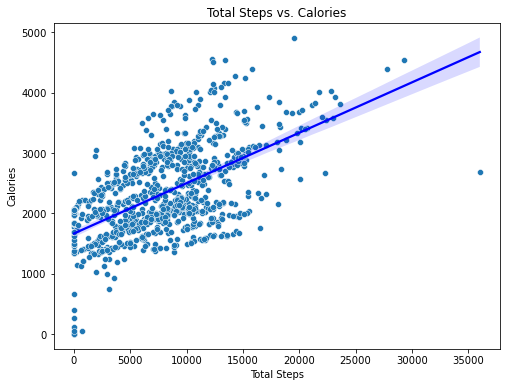

In [83]:
#Total Steps vs. Calories
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_activity, x='TotalSteps', y='Calories')

# Adding a smoothing line
sns.regplot(data=daily_activity, x='TotalSteps', y='Calories', scatter=False, color='blue')

# Customizing plot
plt.title("Total Steps vs. Calories")
plt.xlabel("Total Steps")
plt.ylabel("Calories")

# Show plot
plt.show()

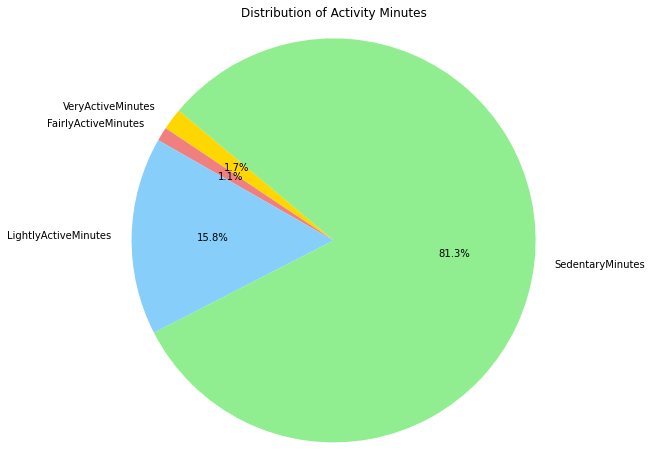

In [84]:
# Selecting the relevant columns for the pie chart
activity_minutes = merged_df2[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]]

# Calculating the total minutes for each activity level
total_minutes = activity_minutes.sum()

# Creating labels for the pie chart
labels = total_minutes.index

# Creating sizes for the pie chart (total minutes for each activity level)
sizes = total_minutes.values

# Creating colors for the pie chart
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Activity Minutes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Above, we see that a majority of the users have a sedentary lifestyle instead of the expectation that most FitBit users have a consistently active lifestyle. We can infer that most Fitbits are used for casual recording, possibly while walking between offices during work, commuting, or running errands. Another possibility is measurement bias, as some users could be cycling, lifting weights, or swimming, while the sensor may classify them as sedentary. Another pitfall is inconsistency - users may not wear their Fitbit every day, whether they forget to wear it or know they won't be walking that day.

In [53]:
# Selecting relevant numerical columns for the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = [
    "TotalSteps", "TotalDistance", "LoggedActivitiesDistance", "VeryActiveDistance", 
    "ModeratelyActiveDistance", "LightActiveDistance", 
    "SedentaryActiveDistance", "VeryActiveMinutes", 
    "FairlyActiveMinutes", "LightlyActiveMinutes", 
    "SedentaryMinutes", "Calories_x", 
    "TotalSleepRecords", "TotalMinutesAsleep", "TotalTimeInBed"
]

In [54]:
# Creating a correlation matrix
correlation_matrix = merged_df2[numerical_columns].corr()

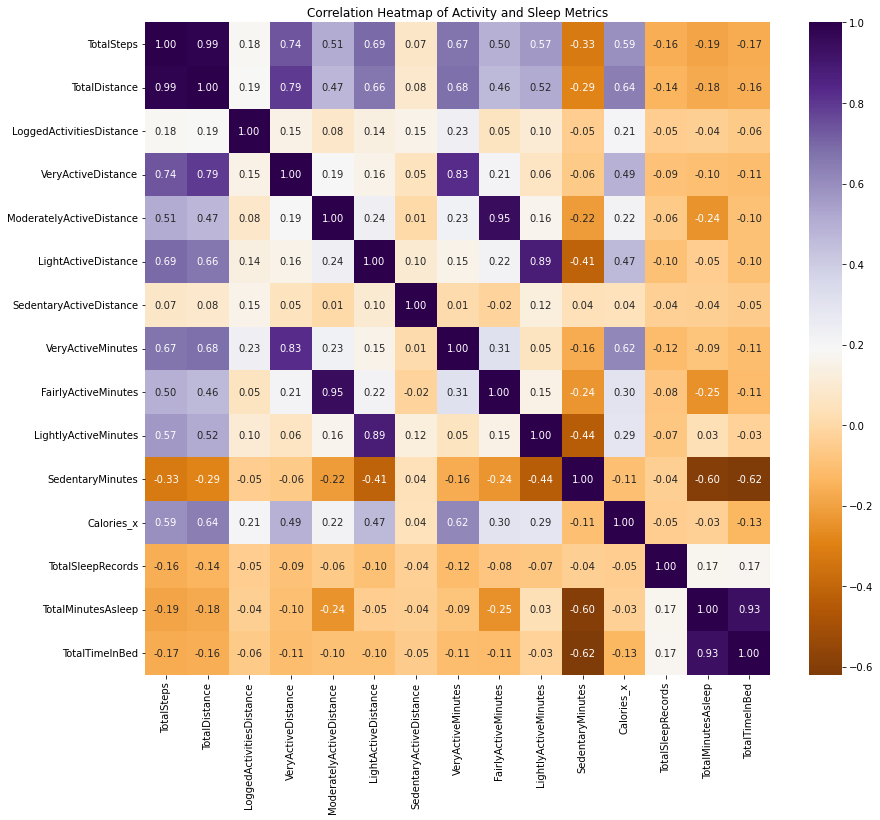

In [55]:
# Creating the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title("Correlation Heatmap of Activity and Sleep Metrics")
plt.show()

### Key Points:

The total distance and total steps show a negative albeit small correlation with sleep time. This suggests that walking more doesn't necessarily mean more sleep.

More time asleep and more time in bed is negatively aggravated by higher sedentary life.
This is supported by some medical sources inferring that disruption during sleep time is the result of low activity.
Based on the stats from above, the average of 7,000 steps a day or roughly 5km is below the 
recommended distance according to the CDC, which is 10,000 steps a day.
The caveat here is the unknown characteristics of the users - their BMI, diet, etc.

The variables 'VeryActiveMinutes' and 'LightlyActiveMinutes' exhibit minimal to negligible correlations with sleep duration. This implies that there is a weak direct relationship between engaging in higher intensity or light activities and the duration of sleep among individuals.

# Act

**Recommendations for improvements in Bellbeat's products:**

1. Provide educational content such as potential recipes for a healthier lifestyle; proper stretching techniques, and relevant user health studies 

2. They can offer incentives and rewards for achieving certain goals, such as discounts or points redeemable for Bellabeat's "Leaf", "Time", and "Spring" products.

3. Foster social engagement to create a sense of community among like-minded individuals striving for a healthy lifestyle. This can include friend challenges, group workouts, and sharing achievements on social media, providing a friendly way to compete with others.

4. Incorporate gamification elements such as challenges, badges, leaderboards, and virtual rewards for reaching milestones, making exercise more enjoyable and rewarding.

5. Be inclusive and considerate of different users' lifestyles. Some users may work night shifts, work more than one job, or attend school. Such conditions may dissaude them from more usage if given broad feedback.

6. Integrate Bellabeat into users' daily routines by sending reminders to wear the device, setting up automatic syncing with other apps and devices, and providing insights into how activity data can inform daily habits and behaviors.